Monte Carol simulation is an important algorithm in finance.  It is very useful for option pricing and risk managment. We can apply Monmte Carlo to price options using the model of stock prices from Black Scholes Merton (1973). The stock price in BSM is a stochastic differential equation with geometric Brownian motion under the risk neutral probability. A discretization scheme for the SDE is given by $S_t=S_{t-\Delta t}exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} W_t)$.

To implement a Monte Carlo valuation for an option the following algorithm can be applied. 
1. Divide the time interval $[0,T]$ in to equal subintervals of length $\Delta t$.
2. Start iterating $i=1,2,\dots,I$.
   
   a. For every time step $t\in{\Delta t, 2\Delta t, \dots, T}$ draw a random number from the normal distribution. 
   
   b. Determine the time T value of the index level $S_T(i)$ for each time step in the discretization scheme: $S_t=S_{t-\Delta t}exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} W_t)$.
   
   c. At T, determine the value of the option $v_T(S_T(i))$ according to the payoff.
   
   d. Iterate until i = I.
   
3. Average all the values of $v_T(S_T(i))$ and discount them back



Question 1: Complete the Monte Carlo below, adding the code for the discretization scheme: $S_t=S_{t-\Delta t}exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma \sqrt{\Delta t} W_t)$.
   

In [4]:
from time import time
from math import exp, sqrt, log
from random import gauss, seed

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# variables
S0 = 100
T = 1.0
r = 0.05
sigma = 0.20
N = 50
dt = T/N
I = 5000

In [6]:
seed(2000)
S=[]
for i in range(I):
    path = []
    for t in range(N+1):
        if t == 0:
            path.append(S0)
            Sprev = S0
        else:
            wt = np.random.normal(0,1)
            St =  Sprev * exp((r-0.5*sigma*sigma)*dt+sigma*sqrt(dt)*wt)
            path.append(St)
            Sprev = St
    S.append(path)

Graph 10 price paths for the stock price:

Text(0,0.5,'idenx label')

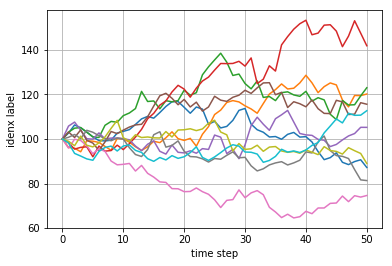

In [7]:
for i in range(1,11):
    plt.plot(S[i])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('idenx label')

Question 2: Using the code from the Monte Carlo and the stock price discretization scheme, price the following options
    
    a) Call with Strike = 105, Maturity T = 1
    
    b) Put with Strik = 105, Maturity T = 1
    
    c) Call with Strike (S-K)^2 , Maturity T = 1
    

In [9]:
seed(2000)
K = 105

S=[]
V = []
for i in range(I):
    path = []
    for t in range(N+1):
        if t == 0:
            path.append(S0)
            Sprev = S0
        else:
            wt = np.random.normal(0,1)
            St =  Sprev * exp((r-0.5*sigma*sigma)*dt+sigma*sqrt(dt)*wt)
            path.append(St)
            Sprev = St
    S.append(path)

    if St-K > 0:
        V.append(St-K)
    else:
        V.append(0)

Call = exp(-r*T) * np.sum(V)/I
print(Call)

8.031460339911469


In [10]:
seed(2000)
K = 105

S=[]
V = []
for i in range(I):
    path = []
    for t in range(N+1):
        if t == 0:
            path.append(S0)
            Sprev = S0
        else:
            wt = np.random.normal(0,1)
            St =  Sprev * exp((r-0.5*sigma*sigma)*dt+sigma*sqrt(dt)*wt)
            path.append(St)
            Sprev = St
    S.append(path)

    if K-St > 0:
        V.append(K-St)
    else:
        V.append(0)

Put = exp(-r*T) * np.sum(V)/I
print(Put)

7.871832453307122


In [11]:
seed(2000)
K = 105

S=[]
V = []
for i in range(I):
    path = []
    for t in range(N+1):
        if t == 0:
            path.append(S0)
            Sprev = S0
        else:
            wt = np.random.normal(0,1)
            St =  Sprev * exp((r-0.5*sigma*sigma)*dt+sigma*sqrt(dt)*wt)
            path.append(St)
            Sprev = St
    S.append(path)

    if ((St-K)*(St-K)) < St:
        V.append((St-(St-K)*(St-K)))
    else:
        V.append(0)

Call = exp(-r*T) * np.sum(V)/I
print(Call)


24.910142607296525
